In [1]:
!pip install pyngrok==4.1.1
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the required libraries

In [2]:
!ngrok authtoken 1oNmyh58ltbuhCn3zbnUHKStOeH_5z5G4ZHwqtjNMAE2TPkTp

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [5]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
from flask import Flask, render_template, request, flash, redirect, url_for, send_from_directory
from flask_ngrok import run_with_ngrok
from PIL import Image
import os
from werkzeug.utils import secure_filename

# Loading The Data

In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analyzing The Data

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train[0]

5

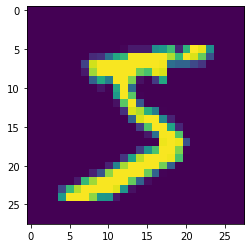

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

# Reshaping The Data

In [11]:
X_train=X_train.reshape(60000,28,28,1).astype('float32')
X_test=X_test.reshape(10000,28,28,1).astype('float32')

# Applying One Hot Encoding

In [12]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Add CNN Layers

In [14]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

# Compiling The Model

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Train The Model

In [16]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 222s 118ms/step - loss: 0.1997 - accuracy: 0.9516 - val_loss: 0.0892 - val_accuracy: 0.9725
Epoch 2/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0663 - accuracy: 0.9797 - val_loss: 0.0691 - val_accuracy: 0.9778
Epoch 3/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0465 - accuracy: 0.9846 - val_loss: 0.0966 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0904 - val_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.1002 - val_accuracy: 0.9771


# Observing The Metrics

In [17]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.10019079595804214, 0.9771000146865845]


# Test The Model

In [18]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 85ms/step
[[5.1875710e-14 1.7647444e-20 2.4055640e-12 1.4563986e-12 2.1019228e-20
  1.6634652e-16 3.5972691e-21 1.0000000e+00 1.4734684e-11 1.5583846e-14]
 [9.5942568e-13 3.7856357e-17 1.0000000e+00 2.1415776e-16 1.0644013e-22
  8.6420462e-22 1.1676075e-15 1.1404149e-25 1.0958316e-17 2.7012459e-23]
 [3.2205699e-07 9.9998903e-01 5.0970690e-09 5.3584123e-11 4.9161645e-06
  1.8947194e-08 1.7707004e-08 1.1056708e-09 5.7614852e-06 3.9462039e-14]
 [1.0000000e+00 6.3664590e-23 1.0405597e-11 4.7540277e-19 4.1474681e-20
  1.9294023e-17 3.7152743e-11 5.6668872e-19 8.6498515e-17 3.1193680e-15]]


In [19]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Observing The Metrics

In [20]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.10019079595804214, 0.9771000146865845]


# Test The Model

In [21]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 26ms/step
[[5.1875710e-14 1.7647444e-20 2.4055640e-12 1.4563986e-12 2.1019228e-20
  1.6634652e-16 3.5972691e-21 1.0000000e+00 1.4734684e-11 1.5583846e-14]
 [9.5942568e-13 3.7856357e-17 1.0000000e+00 2.1415776e-16 1.0644013e-22
  8.6420462e-22 1.1676075e-15 1.1404149e-25 1.0958316e-17 2.7012459e-23]
 [3.2205699e-07 9.9998903e-01 5.0970690e-09 5.3584123e-11 4.9161645e-06
  1.8947194e-08 1.7707004e-08 1.1056708e-09 5.7614852e-06 3.9462039e-14]
 [1.0000000e+00 6.3664590e-23 1.0405597e-11 4.7540277e-19 4.1474681e-20
  1.9294023e-17 3.7152743e-11 5.6668872e-19 8.6498515e-17 3.1193680e-15]]


In [22]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Save The Model

In [23]:
model.save('models/mnistCNN.h5')

# Test With Saved Model

In [24]:
from tensorflow.keras.models import load_model
model=load_model(r'models/mnistCNN.h5')
from PIL import Image
import numpy as np
for index in range(4):
    img=Image.open('models/sample.png').convert("L")
    img=img.resize((28,28))
    im2arr=np.array(img)
    im2arr=im2arr.reshape(1,28,28,1)
    y_pred=model.predict(im2arr)
    print(y_pred)

1/1 [==============================] - 0s 56ms/step
[[3.7777948e-21 2.1137608e-18 6.9862629e-17 1.0000000e+00 3.8744688e-22
  4.5765199e-15 3.4451544e-23 3.7634199e-24 1.2246749e-14 1.5022834e-15]]
1/1 [==============================] - 0s 19ms/step
[[3.7777948e-21 2.1137608e-18 6.9862629e-17 1.0000000e+00 3.8744688e-22
  4.5765199e-15 3.4451544e-23 3.7634199e-24 1.2246749e-14 1.5022834e-15]]
1/1 [==============================] - 0s 18ms/step
[[3.7777948e-21 2.1137608e-18 6.9862629e-17 1.0000000e+00 3.8744688e-22
  4.5765199e-15 3.4451544e-23 3.7634199e-24 1.2246749e-14 1.5022834e-15]]
1/1 [==============================] - 0s 18ms/step
[[3.7777948e-21 2.1137608e-18 6.9862629e-17 1.0000000e+00 3.8744688e-22
  4.5765199e-15 3.4451544e-23 3.7634199e-24 1.2246749e-14 1.5022834e-15]]


In [ ]:
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

app = Flask(__name__, template_folder='templates', static_folder='static')
run_with_ngrok(app)

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS


@app.route("/", methods = ['GET', 'POST'])
def index():
  if request.method == 'POST':
    file = request.files['file']
    if 'file' not in request.files:
            flash('No file part')
            return redirect(request.url)
    if file and allowed_file(file.filename):
      UPLOAD_FOLDER = os.path.join('static', 'uploads')
      app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
      
      img_filename = secure_filename(file.filename)
      file.save(os.path.join(app.config['UPLOAD_FOLDER'], img_filename))
      uploaded_img_file_path = os.path.join(app.config['UPLOAD_FOLDER'], img_filename)
      

      img = Image.open(request.files['file'].stream).convert("L")
      img=img.resize((28,28))
      im2arr=np.array(img)
      im2arr=im2arr.reshape(1,28,28,1)
      y_pred=model.predict(im2arr)
      classes=np.argmax(y_pred,axis=1)
  

      return render_template('result.html', uploaded_img_file_path=uploaded_img_file_path, result=classes[0])
  return render_template('index.html')


app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://f922-35-230-25-125.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [13/Nov/2022 15:14:54] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/Nov/2022 15:14:55] "GET /static/css/template.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/Nov/2022 15:14:55] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/Nov/2022 15:14:56] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/Nov/2022 15:14:58] "GET /static/css/template.css HTTP/1.1" 200 -


1/1 [==============================] - 0s 23ms/step


INFO:werkzeug:127.0.0.1 - - [13/Nov/2022 15:15:05] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/Nov/2022 15:15:05] "GET /static/uploads/sample.png HTTP/1.1" 200 -
